## Hull-White Model
This notebook uses the model `finmc.models.hullwhite.HullWhiteMC` and shows how to
- create dataset for this model, with and without a term structure of rates
- use `finmc` calcs to plot asset evolution.

In [1]:
import numpy as np

from finmc.models.hullwhite import HullWhiteMC
from finmc.plots.asset import plot_asset

Create dataset for this model. See [Hull-Whote Model Documentation](https://finlib.github.io/finmc/models/hullwhite/) for explanation of model parameters. We will first create a dataset with a zero rate curve that is flat at 5%.


In [2]:
dataset = {
    "MC": {"PATHS": 100_000, "TIMESTEP": 1 / 250, "SEED": 1},
    "BASE": "USD",
    "ASSETS": {"USD": ("ZERO_RATES", np.array([[2.0, 0.05]]))},
    "HW": {
        "ASSET": "USD",
        "MEANREV": 0.1,
        "VOL": 0.03,
    },
}

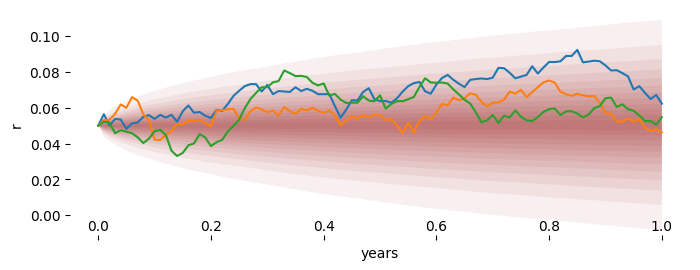

In [3]:
# create the model and plot the progression of short rate
model = HullWhiteMC(dataset)
plot_asset(model, "r")

Change the zero rate curve to have a term structure. Note the impact on the evolution of the short rates.

| Year | Rate |
|------|------|
| 0.2  | 5.0% |
| 0.5  | 4.5% |
| 1.0  | 4.0% |

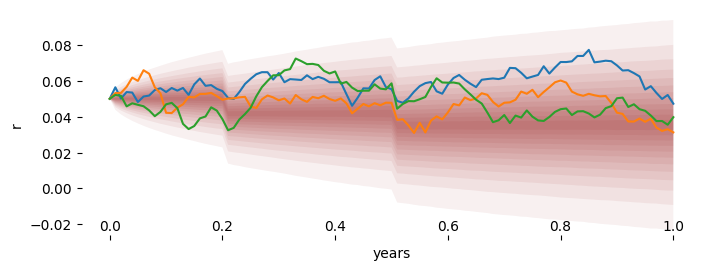

In [4]:
# Change the yield curve to be not flat, in place.
dataset["ASSETS"]["USD"] = (
    "ZERO_RATES",
    np.array([[0.2, 0.05], [0.5, 0.045], [1.0, 0.04]]),
)
plot_asset(model, "r")